<a href="https://colab.research.google.com/github/tjsiledar/Neural-Networks/blob/master/NeuralNetsCats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
np.random.seed(1)

In [0]:
def initialize_parameters_deep(layer_dims):
  
  np.random.seed(1)
  parameters = {}
  L = len(layer_dims)
  
  for l in range(1,L):
    parameters["W" + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])/np.sqrt(layer_dims[l-1])
    parameters["b" + str(l)] = np.zeros([layer_dims[l],1])
    

  
  
  return parameters

In [0]:
def relu(Z):
  A =  np.maximum(0,Z)
  
  return A

In [0]:
def sigmoid(Z):
  A = 1/(1+np.exp(-Z))
  
  return A

In [0]:
def L_model_forward(X,parameters):
  
  caches = []
  A = X
  L = len(parameters)//2
  
  for l in range(1,L):
    A_prev = A
    W = parameters["W" + str(l)]
    b = parameters["b" + str(l)]
    
    Z = np.dot(W,A_prev) + b
    A = relu(Z)
    cache = (A_prev,W,b,Z)
    caches.append(cache)
  
  W = parameters["W" + str(L)]
  b = parameters["b" + str(L)]
  
  Z = np.dot(W,A) + b
  AL = sigmoid(Z)
  cache = (A,W,b,Z)
  caches.append(cache)
  
  return AL, caches

In [0]:
def compute_cost(AL,Y):
  
  m = Y.shape[1]
  
  cost = (-1/m) * np.sum(np.multiply(Y,np.log(AL)) + np.multiply((1-Y),np.log(1-AL)))
  
  return cost

In [0]:
def sigmoid_back(dA,Z):
  s = 1/(1+np.exp(-Z))
  dZ = dA*s*(1-s)
  assert(dZ.shape == Z.shape)
  return dZ

In [0]:
def relu_back(dA,Z):
  dZ = np.array(dA, copy=True)
  
  dZ[Z<=0]=0
  assert(dZ.shape == Z.shape)
  
  return dZ

In [0]:
def L_model_backward(AL,Y,caches):
  
  grads = {}
  L = len(caches)
  m = AL.shape[1]
  
  dAL = -(np.divide(Y,AL) - np.divide((1-Y),(1-AL)))
  current_cache = caches[L-1]
  
  A_prev,W,b,Z = current_cache
  m = A_prev.shape[1]
  
  dZ = sigmoid_back(dAL,Z)
  dW = (1/m)*np.dot(dZ,A_prev.T)
  db = (1/m)*np.sum(dZ, axis=1, keepdims=True)
  dA_prev = np.dot(W.T,dZ)
  
  grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = dA_prev,dW,db
  
  
  for l in reversed(range(L-1)):
    
    current_cache = caches[l]
    A_prev,W,b,Z = current_cache
    m = A_prev.shape[1]
    dZ  = relu_back(grads["dA" + str(l+1)],Z)
    dW = (1/m)*np.dot(dZ,A_prev.T)
    db = (1/m)*np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    
    grads["dA" + str(l)], grads["dW" + str(l+1)], grads["db" + str(l+1)] = dA_prev,dW,db
  
  return grads
  

In [0]:
def update_parameters(parameters,grads,learning_rate):
  
  L = len(parameters)//2
  
  for l in range(L):
    parameters["W" + str(l+1)]  = parameters["W" + str(l+1)] - learning_rate*grads["dW" + str(l+1)]
    parameters["b" + str(l+1)]  = parameters["b" + str(l+1)] - learning_rate*grads["db" + str(l+1)]
    
  return parameters

In [0]:
def nn_model(X,Y,layer_dims, learning_rate, num_iterations, print_cost=False):
  
  np.random.seed(1)
  costs = []
  
  parameters = initialize_parameters_deep(layer_dims)
  #print(parameters)
  
  for i in range(0,num_iterations):
    AL, caches = L_model_forward(X,parameters)
   
    cost = compute_cost(AL,Y)
    
    grads = L_model_backward(AL,Y,caches)
    
    parameters = update_parameters(parameters, grads, learning_rate)
    
    if print_cost and i % 100 == 0:
      print ("Cost after iteration %i: %f" %(i, cost))
    if print_cost and i % 100 == 0:
      costs.append(cost)
      
    
    
   # input("press enter to continue")
  
  plt.plot(np.squeeze(costs))
  plt.ylabel('cost')
  plt.xlabel('iterations (per tens)')
  plt.title("Learning rate =" + str(learning_rate))
  plt.show()
      
  return parameters

In [14]:
from google.colab import files
files.upload()

{}

In [0]:
import h5py
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [0]:
train_dataset = h5py.File("train_catvnoncat.h5","r")

In [17]:
train_set_x_orig = np.array(train_dataset["train_set_x"][:])
train_set_x_orig.shape

(209, 64, 64, 3)

In [18]:
train_set_y = np.array(train_dataset["train_set_y"][:])
train_set_y = train_set_y.reshape(1, train_set_y.shape[0])
train_set_y.shape

(1, 209)

In [0]:
test_dataset = h5py.File("test_catvnoncat.h5","r")

In [20]:
test_set_x_orig = np.array(test_dataset["test_set_x"][:])
test_set_x_orig.shape

(50, 64, 64, 3)

In [0]:
num_px = test_set_x_orig.shape[1]

In [21]:
test_set_y = np.array(test_dataset["test_set_y"][:])
test_set_y = test_set_y.reshape(1,test_set_y.shape[0])
test_set_y.shape

(1, 50)

In [22]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
train_set_x_flatten.shape

(12288, 209)

In [23]:
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
test_set_x_flatten.shape

(12288, 50)

In [0]:
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

In [25]:
train_set_x.shape

(12288, 209)

In [26]:
train_set_x

array([[0.06666667, 0.76862745, 0.32156863, ..., 0.56078431, 0.08627451,
        0.03137255],
       [0.12156863, 0.75294118, 0.27843137, ..., 0.60784314, 0.09411765,
        0.10980392],
       [0.21960784, 0.74509804, 0.26666667, ..., 0.64705882, 0.09019608,
        0.20784314],
       ...,
       [0.        , 0.32156863, 0.54117647, ..., 0.33333333, 0.01568627,
        0.        ],
       [0.        , 0.31372549, 0.55294118, ..., 0.41960784, 0.01960784,
        0.        ],
       [0.        , 0.31764706, 0.55686275, ..., 0.58431373, 0.        ,
        0.        ]])

In [0]:
layer_dims = [12288,20,7,5,1]

Cost after iteration 0: 0.771749
Cost after iteration 100: 0.672053
Cost after iteration 200: 0.648263
Cost after iteration 300: 0.611507
Cost after iteration 400: 0.567047
Cost after iteration 500: 0.540138
Cost after iteration 600: 0.527930
Cost after iteration 700: 0.465477
Cost after iteration 800: 0.369126
Cost after iteration 900: 0.391747
Cost after iteration 1000: 0.315187
Cost after iteration 1100: 0.272700
Cost after iteration 1200: 0.237419
Cost after iteration 1300: 0.199601
Cost after iteration 1400: 0.189263
Cost after iteration 1500: 0.161189
Cost after iteration 1600: 0.148214
Cost after iteration 1700: 0.137775
Cost after iteration 1800: 0.129740
Cost after iteration 1900: 0.121225
Cost after iteration 2000: 0.113821
Cost after iteration 2100: 0.107839
Cost after iteration 2200: 0.102855
Cost after iteration 2300: 0.100897
Cost after iteration 2400: 0.092878


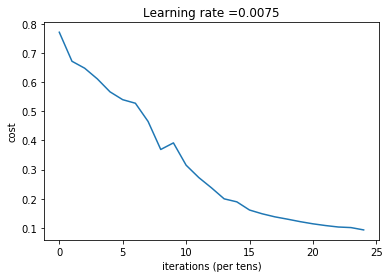

In [39]:
parameters = nn_model(train_set_x,train_set_y,layer_dims, learning_rate=0.0075, num_iterations = 2500, print_cost=True)

In [0]:
def predict(X,Y,parameters):
  
  m = X.shape[1]
  n = len(parameters)//2
  p = np.zeros((1,m))
  
  a, cache = L_model_forward(X,parameters)
  
  for i in range(0, a.shape[1]):
    if a[0,i] > 0.5:
      p[0,i] = 1
    else:
      p[0,i] = 0
  
  print("Accuracy : " + str(np.sum((p == Y)/m)))
  
  return p

In [53]:
predict(train_set_x, train_set_y, parameters)

Accuracy : 0.9856459330143539


array([[0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
        0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
        0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
        1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
        0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0.]])

In [54]:
predict(test_set_x,test_set_y, parameters)

Accuracy : 0.8


array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
        0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
        1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 0.]])

In [0]:
my_image = "cat03.jpg"
img = Image.open(my_image)

In [0]:
img = img.resize((num_px,num_px))

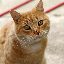

In [89]:
img

In [0]:
img = np.array(img).astype(float)
img = img/255

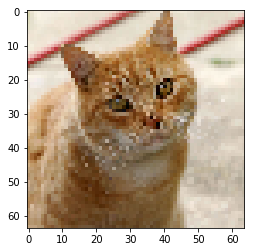

In [91]:
plt.imshow(img)

In [0]:
a = img.reshape((1,num_px*num_px*3)).T

In [93]:
a.shape

(12288, 1)

In [0]:
my_label = [1]

In [95]:
predict(a,my_label,parameters)

Accuracy : 1.0


array([[1.]])